In [1]:
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import seaborn as sns


In [2]:
# Load the dataset from the CSV file
dataset = load_dataset('csv', data_files=r'C:\Users\sami.laham\Documents\Sam\Data Analysis Training\Luke Barousse\CSV files\data_jobs.csv')

# Convert the dataset to a pandas DataFrame
df = dataset['train'].to_pandas()

# Data Cleaning: Convert the 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Show the first few rows of the DataFrame to check the results


In [3]:
 df_DA_Spain = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()

In [4]:
df_DA_Spain ['job_posted_month_no'] = df_DA_Spain ['job_posted_date'].dt.month

In [5]:
df_DA_Spain_explode = df_DA_Spain.explode('job_skills')

In [6]:
df_DA_Spain_explode.pivot_table(index = 'job_posted_month_no', columns= 'job_skills', aggfunc = 'size', fill_value= 0)

job_skills,airflow,alteryx,angular,asana,atlassian,aurora,aws,azure,bash,bigquery,...,unix,vb.net,vba,visio,visual basic,vue,webex,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,7,2,0,0,2,9,13,0,3,...,0,0,3,0,0,0,0,0,1,2
2,2,1,0,0,0,0,7,13,0,6,...,0,0,6,0,0,0,1,1,2,1
3,0,1,0,0,0,0,2,5,0,4,...,0,0,2,0,0,0,0,0,4,0
4,1,2,1,0,0,0,6,10,0,6,...,1,0,5,0,1,0,0,1,3,0
5,0,0,0,0,0,0,4,2,0,6,...,0,0,9,1,0,0,0,0,4,0
6,2,2,0,1,0,0,9,6,0,7,...,0,0,5,0,0,1,0,0,2,0
7,5,3,0,1,0,0,5,6,0,4,...,0,1,4,0,0,0,0,0,1,1
8,6,3,1,0,1,0,11,12,0,10,...,0,1,5,0,0,0,0,2,0,0
9,4,1,1,0,0,2,11,10,2,11,...,0,0,1,0,1,0,0,1,2,1


In [7]:
df_DA_Spain_pivot = df_DA_Spain_explode.pivot_table(index = 'job_posted_month_no', columns= 'job_skills', aggfunc = 'size', fill_value= 0)

df_DA_Spain_pivot.loc ['Total'] = df_DA_Spain_pivot.sum()

df_DA_Spain_pivot

job_skills,airflow,alteryx,angular,asana,atlassian,aurora,aws,azure,bash,bigquery,...,unix,vb.net,vba,visio,visual basic,vue,webex,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,7,2,0,0,2,9,13,0,3,...,0,0,3,0,0,0,0,0,1,2
2,2,1,0,0,0,0,7,13,0,6,...,0,0,6,0,0,0,1,1,2,1
3,0,1,0,0,0,0,2,5,0,4,...,0,0,2,0,0,0,0,0,4,0
4,1,2,1,0,0,0,6,10,0,6,...,1,0,5,0,1,0,0,1,3,0
5,0,0,0,0,0,0,4,2,0,6,...,0,0,9,1,0,0,0,0,4,0
6,2,2,0,1,0,0,9,6,0,7,...,0,0,5,0,0,1,0,0,2,0
7,5,3,0,1,0,0,5,6,0,4,...,0,1,4,0,0,0,0,0,1,1
8,6,3,1,0,1,0,11,12,0,10,...,0,1,5,0,0,0,0,2,0,0
9,4,1,1,0,0,2,11,10,2,11,...,0,0,1,0,1,0,0,1,2,1


In [ ]:
df_DA_Spain_pivot = df_DA_Spain_explode.pivot_table(index = 'job_posted_month_no', columns= 'job_skills', aggfunc = 'size', fill_value= 0)

df_DA_Spain_pivot.loc ['Total'] = df_DA_Spain_pivot.sum()

df_DA_Spain_pivot[df_DA_Spain_pivot.loc ['Total'].sort_values(ascending= False).index]

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,78,50,37,43,35,21,26,13,9,9,...,0,0,0,0,1,0,0,0,0,0
2,57,49,36,36,25,23,14,13,5,7,...,0,0,0,0,0,1,0,0,0,0
3,54,34,36,20,18,14,10,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,69,40,24,22,26,25,14,10,8,6,...,0,1,0,0,0,0,0,0,1,0
5,58,37,23,25,29,18,16,2,6,4,...,0,0,0,0,0,0,0,0,0,0
6,65,34,37,27,17,12,8,6,4,9,...,0,0,0,0,0,0,0,0,0,0
7,65,48,19,28,25,16,16,6,5,5,...,0,0,1,1,0,0,0,0,0,0
8,90,64,41,41,38,28,18,12,14,11,...,1,0,0,0,0,0,0,0,0,0
9,69,42,29,30,31,17,20,10,21,11,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df_DA_Spain_pivot = df_DA_Spain_explode.pivot_table(index = 'job_posted_month_no', columns= 'job_skills', aggfunc = 'size', fill_value= 0)

df_DA_Spain_pivot.loc ['Total'] = df_DA_Spain_pivot.sum()

df_DA_Spain_pivot = df_DA_Spain_pivot[df_DA_Spain_pivot.loc ['Total'].sort_values(ascending= False).index]

df_DA_Spain_pivot = df_DA_Spain_pivot.drop ('Total')

df_DA_Spain_pivot

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,78,50,37,43,35,21,26,13,9,9,...,0,0,0,0,1,0,0,0,0,0
2,57,49,36,36,25,23,14,13,5,7,...,0,0,0,0,0,1,0,0,0,0
3,54,34,36,20,18,14,10,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,69,40,24,22,26,25,14,10,8,6,...,0,1,0,0,0,0,0,0,1,0
5,58,37,23,25,29,18,16,2,6,4,...,0,0,0,0,0,0,0,0,0,0
6,65,34,37,27,17,12,8,6,4,9,...,0,0,0,0,0,0,0,0,0,0
7,65,48,19,28,25,16,16,6,5,5,...,0,0,1,1,0,0,0,0,0,0
8,90,64,41,41,38,28,18,12,14,11,...,1,0,0,0,0,0,0,0,0,0
9,69,42,29,30,31,17,20,10,21,11,...,0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='job_posted_month_no'>

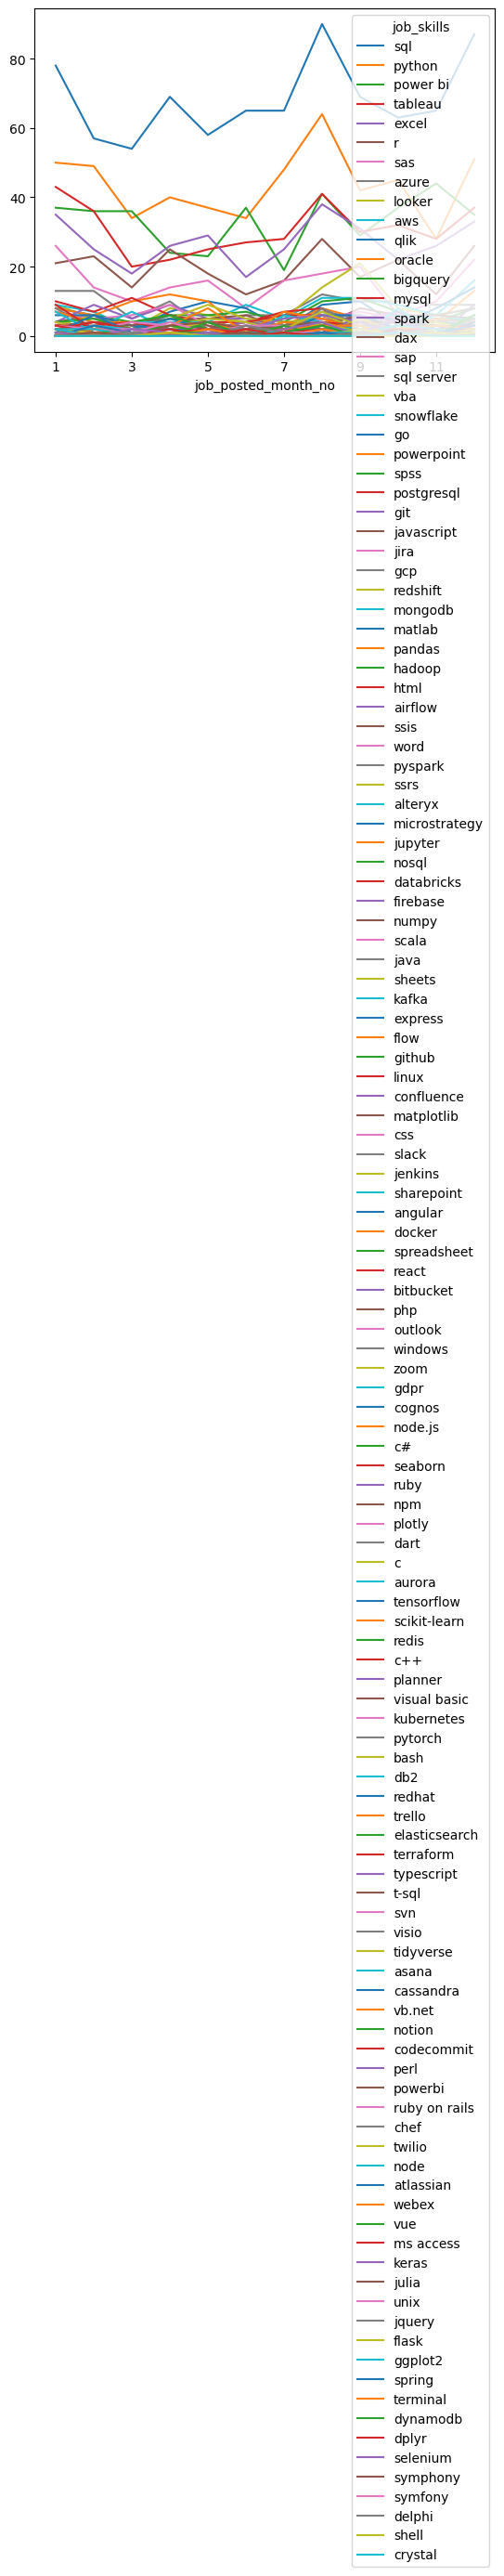

In [10]:
df_DA_Spain_pivot.plot(kind = 'line')

In [11]:
df_DA_Spain.groupby ('job_posted_month_no').size()

job_posted_month_no
1     122
2     110
3      82
4      98
5      87
6      89
7      86
8     137
9     102
10    101
11     85
12    126
dtype: int64

In [12]:
DA_totals = df_DA_Spain.groupby ('job_posted_month_no').size()

In [ ]:
df_DA_Spain_percent = df_DA_Spain_pivot.div (DA_totals/100, axis = 0)
df_DA_Spain_percent

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,63.934426,40.983607,30.327869,35.245902,28.688525,17.213115,21.311475,10.655738,7.377049,7.377049,...,0.000000,0.000000,0.000000,0.000000,0.819672,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.818182,44.545455,32.727273,32.727273,22.727273,20.909091,12.727273,11.818182,4.545455,6.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000
3,65.853659,41.463415,43.902439,24.390244,21.951220,17.073171,12.195122,6.097561,2.439024,2.439024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,70.408163,40.816327,24.489796,22.448980,26.530612,25.510204,14.285714,10.204082,8.163265,6.122449,...,0.000000,1.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020408,0.000000
5,66.666667,42.528736,26.436782,28.735632,33.333333,20.689655,18.390805,2.298851,6.896552,4.597701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,73.033708,38.202247,41.573034,30.337079,19.101124,13.483146,8.988764,6.741573,4.494382,10.112360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,75.581395,55.813953,22.093023,32.558140,29.069767,18.604651,18.604651,6.976744,5.813953,5.813953,...,0.000000,0.000000,1.162791,1.162791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,65.693431,46.715328,29.927007,29.927007,27.737226,20.437956,13.138686,8.759124,10.218978,8.029197,...,0.729927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,67.647059,41.176471,28.431373,29.411765,30.392157,16.666667,19.607843,9.803922,20.588235,10.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000


In [14]:
df_DA_Spain_percent = df_DA_Spain_percent.reset_index()
df_DA_Spain_percent ['job_posted_month'] = df_DA_Spain_percent ['job_posted_month_no'].apply (lambda x: pd.to_datetime (x, format = '%m').strftime('%b'))
df_DA_Spain_percent = df_DA_Spain_percent.set_index ('job_posted_month')
df_DA_Spain_percent = df_DA_Spain_percent.drop (columns = 'job_posted_month_no')

df_DA_Spain_percent

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,63.934426,40.983607,30.327869,35.245902,28.688525,17.213115,21.311475,10.655738,7.377049,7.377049,...,0.000000,0.000000,0.000000,0.000000,0.819672,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.818182,44.545455,32.727273,32.727273,22.727273,20.909091,12.727273,11.818182,4.545455,6.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000
Mar,65.853659,41.463415,43.902439,24.390244,21.951220,17.073171,12.195122,6.097561,2.439024,2.439024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,70.408163,40.816327,24.489796,22.448980,26.530612,25.510204,14.285714,10.204082,8.163265,6.122449,...,0.000000,1.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020408,0.000000
May,66.666667,42.528736,26.436782,28.735632,33.333333,20.689655,18.390805,2.298851,6.896552,4.597701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.033708,38.202247,41.573034,30.337079,19.101124,13.483146,8.988764,6.741573,4.494382,10.112360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,75.581395,55.813953,22.093023,32.558140,29.069767,18.604651,18.604651,6.976744,5.813953,5.813953,...,0.000000,0.000000,1.162791,1.162791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,65.693431,46.715328,29.927007,29.927007,27.737226,20.437956,13.138686,8.759124,10.218978,8.029197,...,0.729927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,67.647059,41.176471,28.431373,29.411765,30.392157,16.666667,19.607843,9.803922,20.588235,10.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000


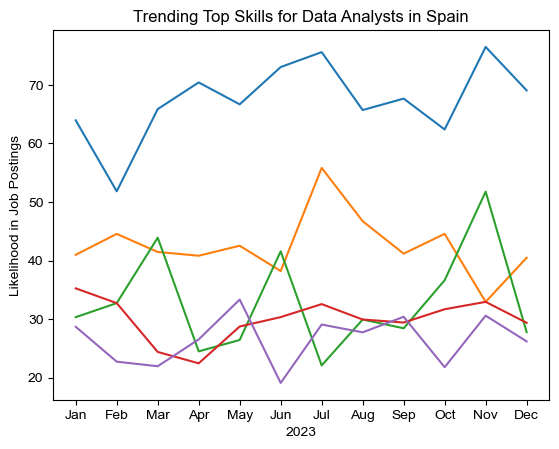

In [15]:
df_plot = df_DA_Spain_percent.iloc[:, :5]

sns.lineplot (data = df_plot, dashes= False, palette = 'tab10')
sns.set_theme (style = 'ticks')

plt.title ('Trending Top Skills for Data Analysts in Spain')
plt.ylabel ('Likelihood in Job Postings')
plt.xlabel ('2023')
plt.legend().remove()

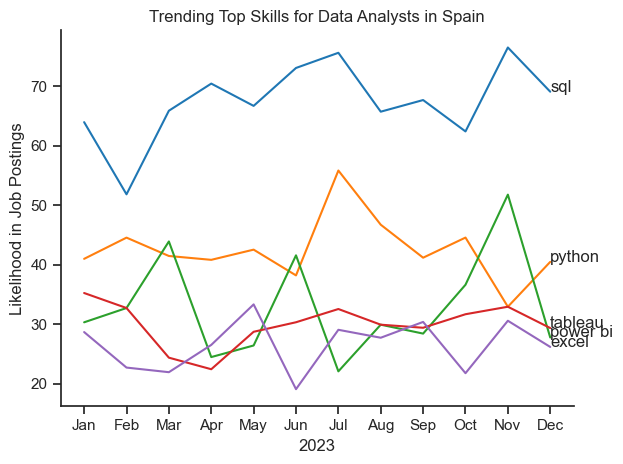

In [16]:
df_plot = df_DA_Spain_percent.iloc[:, :5]

sns.lineplot (data = df_plot, dashes= False, palette = 'tab10')
sns.set_theme (style = 'ticks')
sns.despine()

plt.title ('Trending Top Skills for Data Analysts in Spain')
plt.ylabel ('Likelihood in Job Postings')
plt.xlabel ('2023')
plt.legend().remove()

for i in range (5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns [i])
plt.tight_layout()

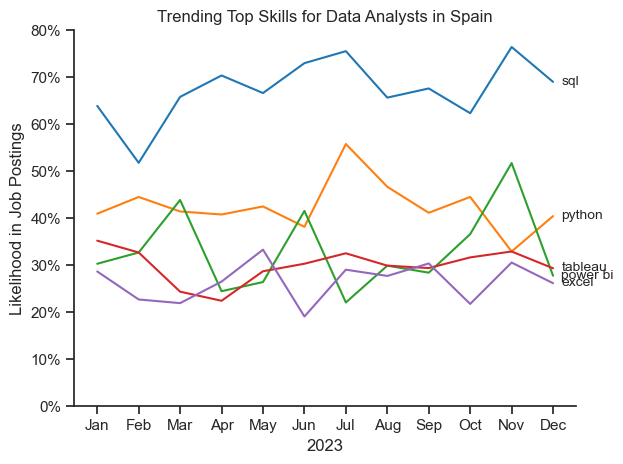

In [31]:
# Updated text alignment logic 
df_plot = df_DA_Spain_percent.iloc[:, :5]

sns.lineplot(data=df_plot, legend = 'full', dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Spain')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.ylim(0, 80)
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

# Track the maximum vertical offset
y_offsets = [0] * 5  # Initialize list to track the y_offset for each label

# Dynamically adjust text placement based on the data
for i in range(5):
    # Get the x and y positions of the last data point
    x_pos = len(df_plot.index) - 1  # Numeric position of the last point
    y_pos = df_plot.iloc[-1, i]  # Value of the last data point for the current line
    
    # Adjust vertical offset to prevent overlap
    offset_y = 0.3 * y_offsets[i]  # Initial offset based on index
    
    # Track if the next text overlaps and adjust accordingly
    y_offsets[i] += 2  # Increment to shift subsequent labels
    
    # Place text slightly offset to avoid overlap
    plt.text(
        x_pos + 0.2,  # Slightly to the right of the last point
        y_pos + offset_y,  # Adjusted vertical offset for each line
        df_plot.columns[i],  # Label (column name)
        ha='left',  # Align text to the left of the point
        va='center',  # Center vertically to the data point
        fontsize=10  # Optional: adjust font size
    )

plt.tight_layout()
plt.show()
